In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y tratamiento de Datos


Lo primera vamos a cargar el dataset con los datos a utilizar.


In [2]:
df = pd.read_csv('datos/silver/result_datos_poblacion_economicos_idealista_inversiones_locales.csv', delimiter=';',header=0)

df_2010_2022 = df[df['Anio'].isin([2012,2022])]
df_2010_2022=df_2010_2022.fillna(0)
list(df_2010_2022.columns)


['Anio',
 'Periodo',
 'CodigoDistrito',
 'NombreDistrito',
 'CodigoBarrio',
 'NombreBarrio',
 'DatoPoblacion',
 'DatoPoblacionMenor16',
 'DatoPoblacionEntre16y64',
 'DatoPoblacionMayor65',
 'DatoSobreEnvejecimiento',
 'DatoSobreenvejecimientoHombres',
 'DatoSobreenvejecimientoMujeres',
 'DatoFeminidad',
 'DatoNacionalidadExtranjera',
 'DatoParadosRegistrados',
 'DatoParadosRegistradosHombres',
 'DatoParadosRegistradosMujer',
 'DatoAfiliacionesTrabajo',
 'DatoAfiliacionesTrabajoHombres',
 'DatoAfiliacionesTrabajoMujer',
 'DatoAfiliacionesResidencia',
 'DatoAfiliacionesResidenciaHombres',
 'DatoAfiliacionesResidenciaMujer',
 'DatoAutonomo',
 'DatoAutonomosHombres',
 'DatoAutonomosMujer',
 'PrecioVentaEurosM2',
 'PrecioAlquilerEurosM2',
 'PresupuestoGasto',
 'Gasto_Real',
 'NumeroLocales',
 'NumeroAlojamientos']

In [3]:
df_features =['CodigoBarrio','NombreBarrio',
 'DatoPoblacion',
 'DatoPoblacionMenor16',
 'DatoPoblacionEntre16y64',
 'DatoPoblacionMayor65',
 'DatoSobreEnvejecimiento',
 'DatoSobreenvejecimientoHombres',
 'DatoSobreenvejecimientoMujeres',
 'DatoFeminidad',
 'DatoNacionalidadExtranjera',
 'DatoParadosRegistrados',
 'DatoParadosRegistradosHombres',
 'DatoParadosRegistradosMujer',
 'DatoAfiliacionesTrabajo',
 'DatoAfiliacionesTrabajoHombres',
 'DatoAfiliacionesTrabajoMujer',
 'DatoAfiliacionesResidencia',
 'DatoAfiliacionesResidenciaHombres',
 'DatoAfiliacionesResidenciaMujer',
 'DatoAutonomo',
 'DatoAutonomosHombres',
 'DatoAutonomosMujer',
 'PrecioVentaEurosM2',
 'PrecioAlquilerEurosM2',
 'PresupuestoGasto',
 'Gasto_Real',
 'NumeroLocales',
 'NumeroAlojamientos']

In [4]:


df_2010_2022 = df_2010_2022.groupby(['CodigoBarrio','NombreBarrio']).agg(
            DatoPoblacion=('DatoPoblacion',min),
            DatPoblacionMenor16=('DatoPoblacionMenor16',min),
            DatPoblacionEntre16y64=('DatoPoblacionEntre16y64',min),
            DatoPoblacionMayor65=('DatoPoblacionMayor65',min),
            DatoSobreEnvejecimiento=('DatoSobreEnvejecimiento',min),
            DatoSobreenvejecimientoHombres=('DatoSobreenvejecimientoHombres',min),
            DatoSobreenvejecimientoMujeres=('DatoSobreenvejecimientoMujeres',min),
            DatoFeminidad=('DatoFeminidad',min),
            DatoNacionalidadExtranjera=('DatoNacionalidadExtranjera',min),
            DatoParadosRegistrados=('DatoParadosRegistrados',min),
            DatoParadosRegistradosHombres=('DatoParadosRegistradosHombres',min),
            DatoParadosRegistradosMujer=('DatoParadosRegistradosMujer',min),
            DatoAfiliacionesTrabajo=('DatoAfiliacionesTrabajo',min),
            DatoAfiliacionesTrabajoHombres=('DatoAfiliacionesTrabajoHombres',min),
            DatoAfiliacionesTrabajoMujer=('DatoAfiliacionesTrabajoMujer',min),
            DatoAfiliacionesResidencia=('DatoAfiliacionesResidencia',min),
            DatoAfiliacionesResidenciaHombres=('DatoAfiliacionesResidenciaHombres',min),
            DatoAfiliacionesResidenciaMujer=('DatoAfiliacionesResidenciaMujer',min),
            DatoAutonomo=('DatoAutonomo',min),
            DatoAutonomosHombres=('DatoAutonomosHombres',min),
            DatoAutonomosMujer=('DatoAutonomosMujer',min),
            PrecioVentaEurosM2=('PrecioVentaEurosM2',min),
            PrecioAlquilerEurosM2=('PrecioAlquilerEurosM2',min),
            PresupuestoGasto=('PresupuestoGasto',min),
            Gasto_Real=('Gasto_Real',min),
            NumeroLocales=('NumeroLocales',min),
            NumeroAlojamientos=('NumeroAlojamientos',min)
).reset_index() 

#df_2010_2022.columns = pd.MultiIndex.from_tuples(list(zip(["features"]*29 ,df_features)))

df_2010_2022.describe()

,CodigoBarrio,DatoPoblacion,DatPoblacionMenor16,DatPoblacionEntre16y64,DatoPoblacionMayor65,DatoSobreEnvejecimiento,DatoSobreenvejecimientoHombres,DatoSobreenvejecimientoMujeres,DatoFeminidad,DatoNacionalidadExtranjera,...,DatoAfiliacionesResidenciaMujer,DatoAutonomo,DatoAutonomosHombres,DatoAutonomosMujer,PrecioVentaEurosM2,PrecioAlquilerEurosM2,PresupuestoGasto,Gasto_Real,NumeroLocales,NumeroAlojamientos
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,...,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,1.310000e+02,1.310000e+02,131.000000,131.0
mean,110.702290,24388.748092,13.552595,65.171527,18.109466,30.967328,26.115267,33.889313,112.922137,11.910840,...,0.169557,887.977099,236.782412,264.333221,2.703427,10.680153,1.289808e+07,7.831140e+06,12.305344,0.0
std,58.906797,13448.874999,4.120867,4.071972,5.658876,5.864927,5.365423,5.962076,8.428297,7.853537,...,1.223267,567.633122,238.681247,181.286748,0.771503,1.688396,1.128594e+07,5.334381e+06,92.985598,0.0
min,11.000000,989.000000,6.180000,53.030000,2.290000,15.980000,11.200000,20.000000,91.400000,0.000000,...,0.000000,48.000000,1.004000,1.062000,1.511000,8.400000,2.215533e+06,2.047953e+06,0.000000,0.0
25%,62.500000,15690.500000,11.055000,62.475000,15.095000,26.855000,22.800000,29.500000,107.650000,7.130000,...,0.000000,400.500000,1.187500,111.000000,1.972500,9.100000,5.715663e+06,4.744619e+06,0.000000,0.0
50%,111.000000,22456.000000,12.280000,65.190000,18.880000,32.300000,26.700000,35.500000,112.600000,11.740000,...,0.000000,823.000000,171.000000,250.000000,2.812000,10.400000,8.155232e+06,6.374392e+06,0.000000,0.0
75%,157.500000,32691.500000,14.900000,67.010000,22.635000,34.900000,29.800000,38.150000,118.750000,16.355000,...,0.000000,1259.000000,445.500000,409.500000,3.184000,11.800000,1.819726e+07,1.075851e+07,0.000000,0.0
max,215.000000,65833.000000,30.010000,76.520000,28.640000,44.600000,40.800000,50.800000,131.000000,35.750000,...,12.769000,2409.000000,803.000000,752.000000,4.187000,14.000000,6.161214e+07,2.376905e+07,977.000000,0.0


In [5]:
df_2010_2022.isna().sum()

CodigoBarrio                         0
NombreBarrio                         0
DatoPoblacion                        0
DatPoblacionMenor16                  0
DatPoblacionEntre16y64               0
DatoPoblacionMayor65                 0
DatoSobreEnvejecimiento              0
DatoSobreenvejecimientoHombres       0
DatoSobreenvejecimientoMujeres       0
DatoFeminidad                        0
DatoNacionalidadExtranjera           0
DatoParadosRegistrados               0
DatoParadosRegistradosHombres        0
DatoParadosRegistradosMujer          0
DatoAfiliacionesTrabajo              0
DatoAfiliacionesTrabajoHombres       0
DatoAfiliacionesTrabajoMujer         0
DatoAfiliacionesResidencia           0
DatoAfiliacionesResidenciaHombres    0
DatoAfiliacionesResidenciaMujer      0
DatoAutonomo                         0
DatoAutonomosHombres                 0
DatoAutonomosMujer                   0
PrecioVentaEurosM2                   0
PrecioAlquilerEurosM2                0
PresupuestoGasto         

/tmp/ipykernel_20448/1577158408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df_2010_2022.corr(), dtype=np.bool_)
/tmp/ipykernel_20448/1577158408.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2010_2022.corr(),


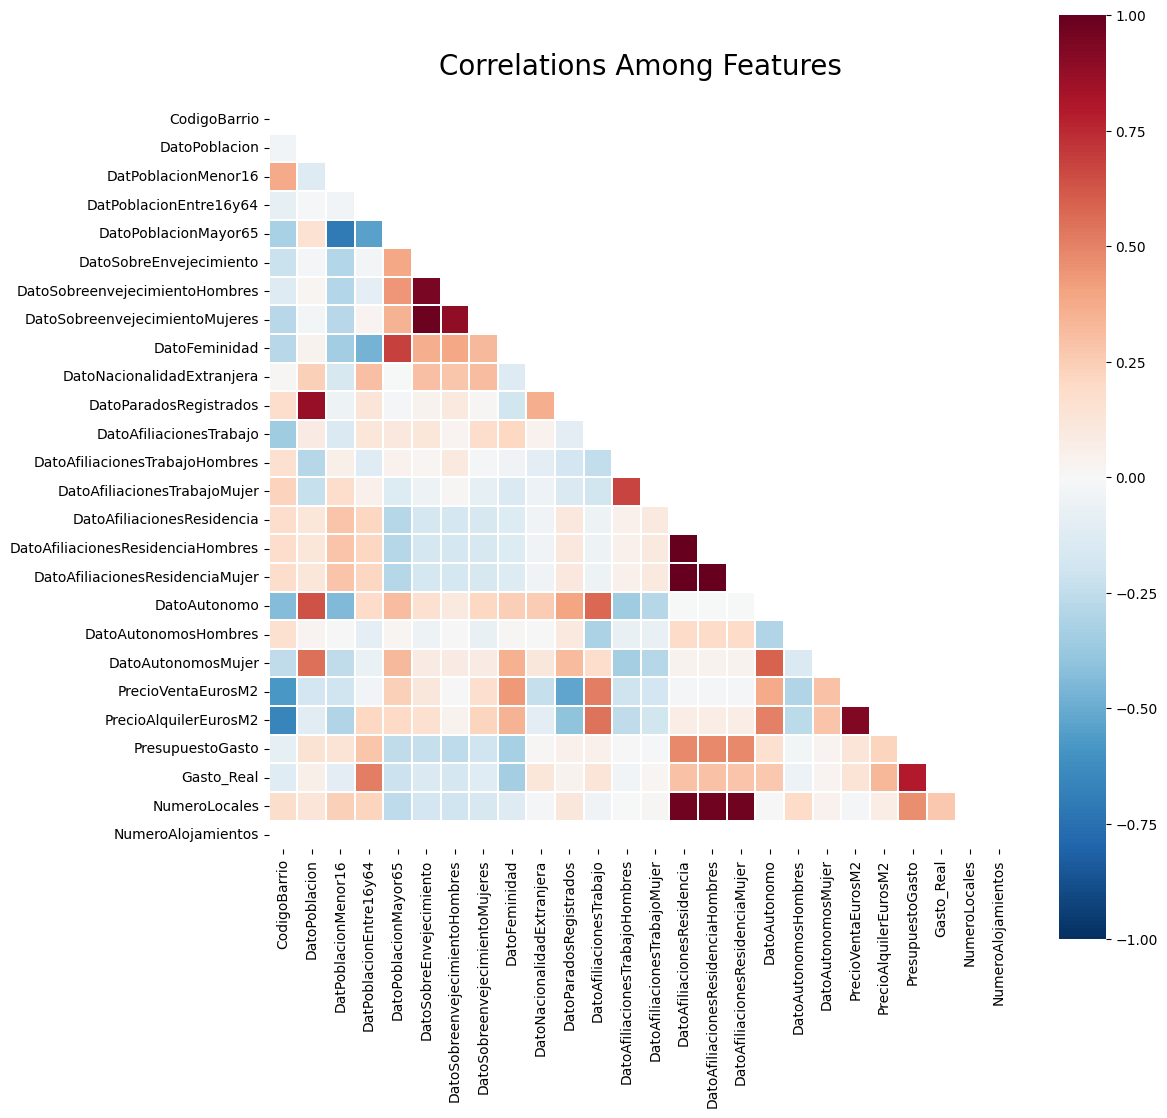

In [6]:
mask = np.zeros_like(df_2010_2022.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df_2010_2022.corr(), 
            annot=False,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmin = -1.0,
            vmax = 1.0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

In [7]:
df_norm = df_2010_2022.copy()
df_norm = df_norm.drop(columns=['NombreBarrio', 'CodigoBarrio'])
x = df_norm.values  


scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)


df_norm = pd.DataFrame(x_scaled)

df_norm

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.104255,-1.537741,1.710500,0.056860,0.005592,-0.526720,0.389052,-1.253222,0.779594,0.046370,...,-0.139142,1.372369,-0.991332,1.797777,0.915451,1.854911,1.799038,2.999240,-0.132844,0.0
1,1.646228,-1.330682,2.573334,-0.807038,0.142520,-0.358335,0.456400,-2.563359,2.278923,1.691260,...,-0.139142,2.650968,-0.989771,-1.455403,0.915451,1.854911,1.799038,2.999240,-0.132844,0.0
2,-1.012189,-1.759416,2.487051,-0.273089,-0.234031,-0.433173,0.001799,-1.277043,1.255085,-0.868216,...,-0.139142,0.470452,-0.991453,0.795526,0.915451,1.854911,1.799038,2.999240,-0.132844,0.0
3,-0.548071,-1.545049,2.173965,-0.464672,0.313679,-0.152532,0.624771,-2.086946,1.183506,-0.469620,...,-0.139142,1.940046,-0.990680,-1.457440,0.915451,1.854911,1.799038,2.999240,-0.132844,0.0
4,0.615733,-1.564537,2.312019,-0.397263,0.228100,-0.246079,0.506911,-1.419967,-1.522443,0.283889,...,-0.139142,2.447595,-0.989695,-1.456128,0.915451,1.854911,1.799038,2.999240,-0.132844,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,-0.352810,0.552337,-1.790141,-0.141819,-2.565226,-2.790558,-2.304879,-0.610064,-0.674997,-0.750821,...,-0.139142,-0.555257,0.556077,-0.328546,0.142570,-0.344931,-0.638847,-0.433188,-0.132844,0.0
127,-1.678958,0.581569,1.027629,-0.863804,0.426645,-0.058985,0.641608,-2.110767,1.177115,-1.280462,...,-0.139142,-1.480164,-0.852856,-1.369558,0.142570,-0.344931,-0.638847,-0.433188,-0.132844,0.0
128,-1.271716,-0.568218,0.911762,-0.299698,0.077479,0.165528,0.085985,-0.991195,0.939369,-1.011546,...,-0.139142,-1.094639,-0.272460,-0.926574,0.142570,-0.344931,-0.638847,-0.433188,-0.132844,0.0
129,-1.142886,1.314802,1.007907,-1.328571,-0.559235,-0.040275,-0.823217,-0.717257,-0.223792,-0.819074,...,-0.139142,-1.018595,-0.276666,-0.682933,0.142570,-0.344931,-0.638847,-0.433188,-0.132844,0.0


/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

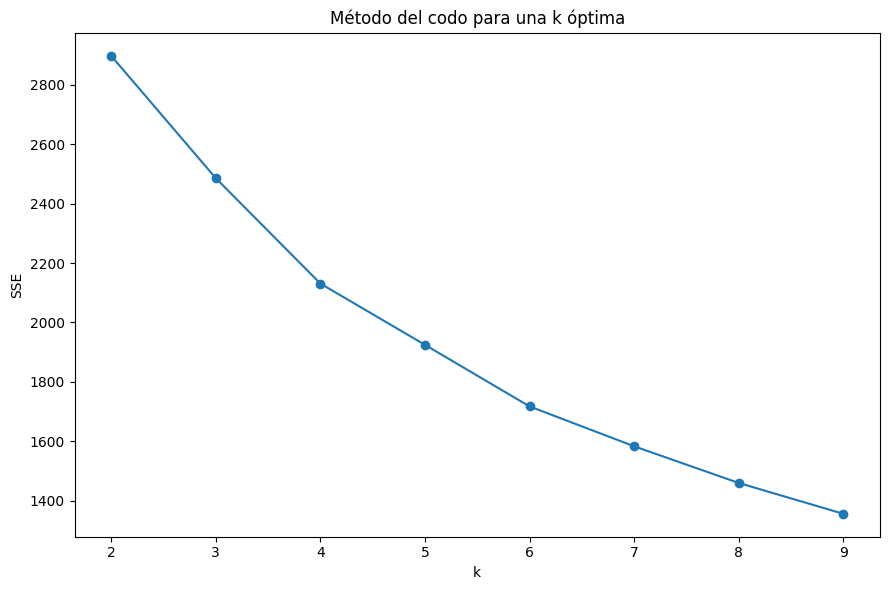

In [8]:
# Elbow method
sse = []
ks = range(2, 10)
for k in ks:
        k_means_model = cluster.KMeans(n_clusters=k, random_state=55)
        k_means_model.fit(df_norm)
        sse.append(k_means_model.inertia_)

fig, axis = plt.subplots(figsize=(9, 6))
axis.set_title('Método del codo para una k óptima')
axis.set_xlabel('k')
axis.set_ylabel('SSE')
plt.plot(ks, sse, marker='o')
plt.tight_layout()
plt.show()


/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3 La media para el método de la silueta: 0.1332398920130704
Para n_clusters = 4 La media para el método de la silueta: 0.1646364627561027


/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 5 La media para el método de la silueta: 0.1836558706665062
Para n_clusters = 6 La media para el método de la silueta: 0.19115060900895356
Para n_clusters = 7 La media para el método de la silueta: 0.18635237592418255


/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 8 La media para el método de la silueta: 0.19519992246156562
Para n_clusters = 9 La media para el método de la silueta: 0.19047749708590006


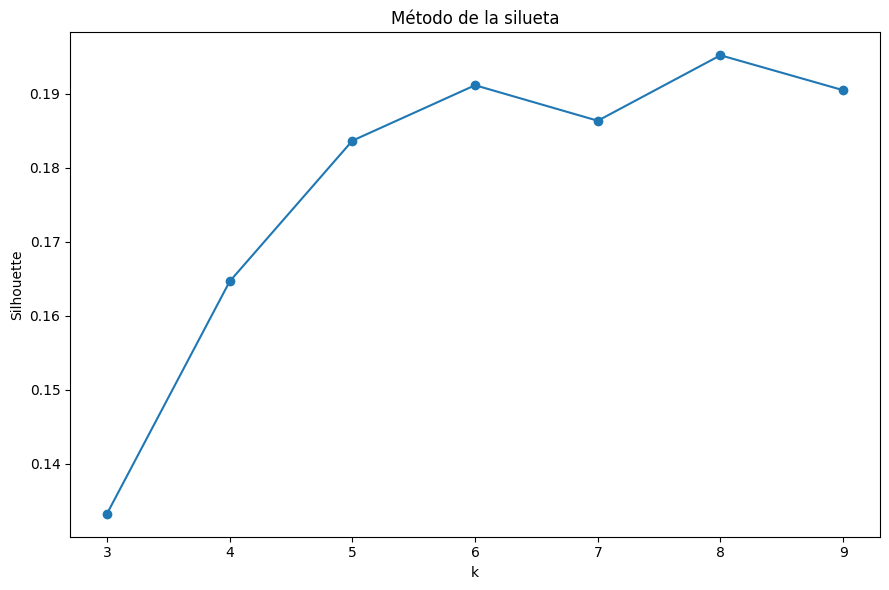

In [9]:
# Silhouette method

ks = range(3, 10)
sils = []
for k in ks:
        clusterer = KMeans(n_clusters=k, random_state=55)
        cluster_labels = clusterer.fit_predict(df_norm)
        silhouette_avg = silhouette_score(df_norm, cluster_labels)
        sils.append(silhouette_avg)
        print("Para n_clusters =", k, "La media para el método de la silueta:",
              silhouette_avg)

fig, axis = plt.subplots(figsize=(9, 6))
axis.set_title('Método de la silueta')
axis.set_xlabel('k')
axis.set_ylabel('Silhouette')
plt.plot(ks, sils, marker='o')
plt.tight_layout()
plt.show()

In [10]:
# Método Mutual Informaks = range(3, 10))

# Inicializar una lista para almacenar los valores de información mutua
mutual_infos = []
ks = range(3, 10)
for k in ks:

    # Ejecutar el algoritmo k-means
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_norm)
    
    # Calcular la información mutua entre las etiquetas de los clusters y las etiquetas verdaderas (no utilizadas en este ejemplo)
    mi = mutual_info_score(labels, labels)
    mutual_infos.append(mi)

# Encontrar el valor máximo de información mutua y el correspondiente número de clusters óptimo
optimal_k = k_values[np.argmax(mutual_infos)]
print("Número óptimo de clusters:", optimal_k)

fig, axis = plt.subplots(figsize=(9, 6))
axis.set_title('Método Mutual Information')
axis.set_xlabel('k')
axis.set_ylabel('Mutual Information')
plt.plot(ks, mutual_infos, marker='o')
plt.tight_layout()
plt.show()



/home/rlahore/anaconda3/envs/awsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'mutual_info_score' is not defined

Es nuestro caso parece que el valor optimo de k estará entre 5 y 6. 

In [ ]:
cluster = KMeans(n_clusters=8, random_state=55)
cluster_labels = cluster.fit_predict(df_norm)

df_result = df_2010_2022[["CodigoBarrio",'NombreBarrio']]
df_result['K_means_k8'] = cluster_labels
    

cluster = KMeans(n_clusters=9, random_state=10)
cluster_labels = cluster.fit_predict(df_norm)

df_result['K_means_k9'] = cluster_labels

df_result.to_csv('datos/gold/result_k8_k9.csv', index=False)

df_result

/home/rafaeloga/anaconda3/envs/TFM/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_9415/2782224265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['K_means_k8'] = cluster_labels
/home/rafaeloga/anaconda3/envs/TFM/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_9415/2782224265.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,CodigoBarrio,NombreBarrio,K_means_k8,K_means_k9
0,11.0,Palacio,4,3
1,12.0,Embajadores,4,3
2,13.0,Cortes,4,3
3,14.0,Justicia,4,3
4,15.0,Universidad,4,3
...,...,...,...,...
126,211.0,Alameda de Osuna,3,0
127,212.0,Aeropuerto,1,6
128,213.0,Casco Histórico de Barajas,2,2
129,214.0,Timón,3,0


In [ ]:
#Gaussian Model

from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture

gaussian_model = GaussianMixture(n_components=8)
cluster_labels = gaussian_model.fit_predict(df_norm)

df_result['Gaussian_8'] = cluster_labels


gaussian_model = GaussianMixture(n_components=9)
cluster_labels = gaussian_model.fit_predict(df_norm)

df_result['Gaussian_9'] = cluster_labels

df_result.to_csv('datos/gold/result_k8_k9_g8_g9.csv', index=False)

cluster_labels

/tmp/ipykernel_9415/3358230817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Gaussian_8'] = cluster_labels
/tmp/ipykernel_9415/3358230817.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Gaussian_9'] = cluster_labels


array([2, 2, 2, 2, 2, 2, 6, 8, 6, 4, 6, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 6, 6, 6, 3, 3, 3, 3, 3, 3, 6,
       5, 8, 8, 8, 0, 4, 6, 6, 3, 3, 6, 4, 4, 4, 5, 0, 0, 8, 5, 4, 8, 6,
       0, 0, 0, 0, 8, 0, 5, 6, 0, 6, 0, 5, 6, 0, 0, 0, 0, 0, 0, 5, 4, 8,
       6, 5, 5, 0, 0, 6, 6, 6, 4, 4, 4, 4, 4, 4, 8, 8, 6, 4, 0, 5, 4, 8,
       8, 0, 4, 7, 8, 1, 1, 1, 0, 6, 6, 0, 4, 6, 8, 4, 4, 4, 5, 4, 4])

In [ ]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import Birch


birch_model = Birch(threshold=0.03, n_clusters=8)
cluster_labels = birch_model.fit_predict(df_norm)
df_result['Birch_8'] = cluster_labels

birch_model = Birch(threshold=0.03, n_clusters=9)
cluster_labels = birch_model.fit_predict(df_norm)
df_result['Birch_9'] = cluster_labels

df_result.to_csv('datos/gold/result_k8_k9_g8_g9_b8_b9.csv', index=False)

cluster_labels

/tmp/ipykernel_9415/1977257975.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Birch_8'] = cluster_labels
/tmp/ipykernel_9415/1977257975.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Birch_9'] = cluster_labels


array([5, 5, 5, 5, 5, 5, 2, 2, 2, 1, 2, 2, 1, 6, 2, 2, 6, 2, 2, 6, 6, 2,
       6, 6, 6, 6, 6, 2, 6, 6, 2, 2, 6, 6, 2, 2, 2, 6, 6, 6, 6, 6, 2, 4,
       2, 0, 0, 1, 0, 1, 4, 2, 6, 2, 2, 1, 1, 1, 4, 0, 0, 0, 3, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 3, 4, 0, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 3, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 4, 3, 1,
       0, 0, 1, 7, 1, 8, 8, 8, 0, 4, 4, 0, 1, 4, 1, 2, 1, 1, 3, 1, 1])

In [ ]:
from sklearn.cluster import AffinityPropagation


affinity_model = AffinityPropagation(damping=0.7)
cluster_labels = affinity_model.fit_predict(df_norm)

df_result['Affinity'] = cluster_labels

df_result.to_csv('datos/gold/result_k5_k6_g5_g6_b5_b6_aff.csv', index=False)

cluster_labels

/tmp/ipykernel_9415/421543175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Affinity'] = cluster_labels


array([ 0,  0,  0,  0,  0,  0,  1, 10,  1, 17,  1,  2,  9,  2,  8,  8,  2,
        2,  8,  3,  3,  1,  2,  2,  2,  2,  2,  1,  2,  2,  2,  5,  3,  2,
        5,  8,  1,  2,  2,  2,  3,  2,  2, 16,  7, 10, 10,  8, 10,  9, 16,
        1,  2,  8,  1, 17,  8, 17, 16,  4,  5, 10,  6,  9, 10,  1,  5,  4,
        4,  5, 12,  5,  6, 17,  5,  1,  5,  6,  1,  5,  4,  5,  5,  5,  4,
        7, 17,  8,  7,  6,  7,  4, 10,  1,  1,  8,  8,  8,  8,  8,  9,  9,
       10, 10,  8,  9,  4, 16, 11, 12,  5,  4, 12, 13, 12, 14, 15,  9,  4,
       16, 16,  5, 12, 17, 12,  8,  9, 17,  6, 17, 17])

In [ ]:
from sklearn.cluster import MeanShift

mean_model = MeanShift()
cluster_labels = mean_model.fit_predict(df_norm)

df_result['MeanShift'] = cluster_labels

df_result.to_csv('datos/gold/result_k5_k6_g5_g6_b5_b6_aff_mean.csv', index=False)

cluster_labels


/tmp/ipykernel_9415/1546661216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['MeanShift'] = cluster_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 1, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.cluster import OPTICS

optics_model = OPTICS(eps=0.75, min_samples=5)
cluster_labels = optics_model.fit_predict(df_norm)

df_result['Optics'] = cluster_labels

df_result.to_csv('datos/gold/result_k5_k6_g5_g6_b5_b6_aff_mean_optics.csv', index=False)

cluster_labels

/tmp/ipykernel_9415/2731304258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Optics'] = cluster_labels


array([ 0, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1,  1,
        2,  2, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  3,  3, -1, -1, -1, -1,
       -1,  1,  2, -1, -1, -1, -1, -1,  5,  4,  3, -1, -1, -1, -1,  4,  5,
        5,  4, -1,  4, -1, -1,  4, -1,  4, -1, -1,  4,  5,  4,  4,  4,  5,
       -1, -1, -1, -1, -1, -1,  5, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,
        3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
from sklearn.cluster import AgglomerativeClustering


agglomerative_model = AgglomerativeClustering(n_clusters=8)

cluster_labels = agglomerative_model.fit_predict(df_norm)

df_result['Agg_8'] = cluster_labels



agglomerative_model = AgglomerativeClustering(n_clusters=9)

cluster_labels = agglomerative_model.fit_predict(df_norm)

df_result['Agg_9'] = cluster_labels

df_result.to_csv('datos/gold/result_k8_k9_g8_g9_b8_b9_aff_mean_optics_ag8_ag9.csv', index=False)

cluster_labels

/tmp/ipykernel_9415/4206872597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Agg_8'] = cluster_labels
/tmp/ipykernel_9415/4206872597.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Agg_9'] = cluster_labels


array([5, 5, 5, 5, 5, 5, 2, 2, 2, 1, 2, 2, 1, 6, 2, 2, 6, 2, 2, 6, 6, 2,
       6, 6, 6, 6, 6, 2, 6, 6, 2, 2, 6, 6, 2, 2, 2, 6, 6, 6, 6, 6, 2, 4,
       2, 0, 0, 1, 0, 1, 4, 2, 6, 2, 2, 1, 1, 1, 4, 0, 0, 0, 3, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 3, 4, 0, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 3, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 4, 3, 1,
       0, 0, 1, 7, 1, 8, 8, 8, 0, 4, 4, 0, 1, 4, 1, 2, 1, 1, 3, 1, 1])